## Iris Flower Species (Setosa, Versicolor, Virginica) Classification Model

**The iris flower dataset is a popular and widely-used dataset in the field of machine learning. It consists of measurements of four features, _independent variables, - (sepal length, sepal width, petal length, and petal width_) - for three different species of iris flowers, _dependent variables or labels: (setosa, versicolor, and virginica_).**

**The goal of this project is to build a classification model that can accurately classify iris flowers based on these measurements.**    



In [1]:
# imports of required modules
from bs4 import BeautifulSoup
import requests
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
# website for scrapping 
url = 'https://www.wikidoc.org/index.php/Iris_flower_data_set'

In [3]:
response = requests.get(url)

In [4]:
# creating a soup object of BeautifulSoup() class
soup = BeautifulSoup(response.text, "html.parser")

In [5]:
# reading of required text datasets from a HTML file using html tags & attribute
list1 = soup.find('tbody').find_all('td')
final_list = []

for i in range(len(list1)):
    final_list.append(list1[i].text.replace('\n', ''))
    
final_list[0:10]

['5.1', '3.5', '1.4', '0.2', 'setosa', '4.9', '3.0', '1.4', '0.2', 'setosa']

In [6]:
# reading of column heading from a HTML file using html tags & attribute
list2 = soup.find('tbody').find_all('th')

col = []
for i in range(len(list2)):
   col.append(list2[i].text.replace('\n', ''))

col

['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']

In [7]:
# using loops to add all the data values into its corresponding column
i = 0
while i < 5:
    col[i] = []
    for j in range(i, len(final_list), 5):
        col[i].append(final_list[j])     
    i += 1
    

## _Pandas Dataframe_

In [8]:
# loading of all datasets into pandas dataframe
iris = pd.DataFrame(list(zip(col[0], col[1], col[2], col[3], col[4])),
                    columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

## _Explore the Dataset_

In [9]:
# preview of top 5 rows
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
# preview of bottom 5 rows
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [11]:
iris.shape

(150, 5)

**_There are a total of 150 rows & 5 columns._**

In [12]:
# check for null values & datatype of columns
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal_length  150 non-null    object
 1   sepal_width   150 non-null    object
 2   petal_length  150 non-null    object
 3   petal_width   150 non-null    object
 4   species       150 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB


In [13]:
# total null-values present per column
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**_There is not any null-value present in the dataset._**

In [14]:
# checking of duplicate rows
iris[iris.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [15]:
# dropping the duplicates 
iris.drop_duplicates(keep='first', inplace=True)

In [16]:
iris.shape

(149, 5)

## _Preprocessing of Data with Scikit Module_

In [17]:
# conversion of categorical label column into numeric type using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit_transform(iris.species)

# 0 ---> setosa
# 1 ---> versicolor
# 2 ---> virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
# create a new column 
iris['species_encoded'] = le.fit_transform(iris.species)

In [19]:
# preview of top 5 rows
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [20]:
# preview of bottom 5 rows
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,2


In [21]:
# datatype for the columns
iris.dtypes

sepal_length       object
sepal_width        object
petal_length       object
petal_width        object
species            object
species_encoded     int32
dtype: object

In [22]:
# conversion of datatype for columns
iris['sepal_length'] = iris['sepal_length'].astype(float)
iris['sepal_width'] = iris['sepal_width'].astype(float)
iris['petal_length'] = iris['petal_length'].astype(float)
iris['petal_width'] = iris['petal_width'].astype(float)

In [23]:
iris.dtypes

sepal_length       float64
sepal_width        float64
petal_length       float64
petal_width        float64
species             object
species_encoded      int32
dtype: object

### _Descriptive Statistics & Correlation-Check_

In [24]:
# statistical summary
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [25]:
# correlation among the columns
iris.drop(['species'], axis=1).corr()

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
species_encoded,0.786971,-0.422987,0.949402,0.956514,1.000000


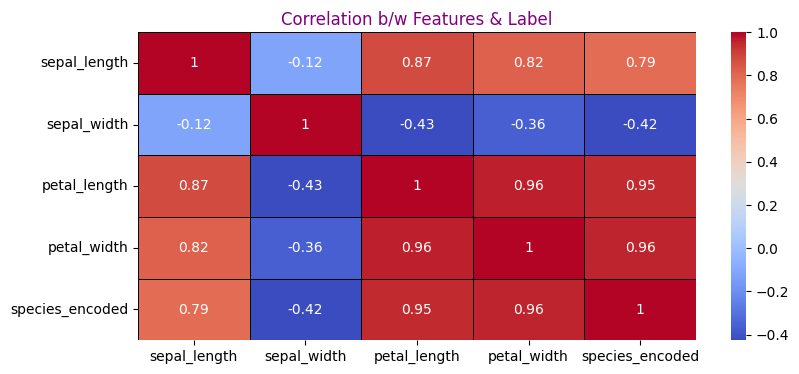

In [26]:
plt.figure(figsize=(9,4))
plt.title('Correlation b/w Features & Label', color='purple')

sns.heatmap(iris.drop(['species'], axis=1).corr(), cbar=True, cmap='coolwarm',
            yticklabels=True, xticklabels=True, annot=True, linewidths=0.5, linecolor='black')

plt.show()

## _Check points from the Correlation Graph:_
**1. species_encoded (Label) is positively (strong) correlated with sepal_length (0.79) and positively (very strong) correlated with petal_length (0.95), petal_width (0.96). Therefore, these features play strongly in the prediction of species-type.**

**2. species_encoded (Label) is negatively (moderate) correlated with sepal_width.**

**3. Features like petal_length & petal_width are highly correlated (0.96), so, we can drop one of these column. Also, petal_length & sepal_length are highly correlated (0.87), so, we can drop one of these two as well.**

**4. Here, I'm going to drop the petal_length column.**

In [27]:
iris.drop(['petal_length'], axis=1, inplace=True)

In [28]:
iris.head()

,sepal_length,sepal_width,petal_width,species,species_encoded
0,5.1,3.5,0.2,setosa,0
1,4.9,3.0,0.2,setosa,0
2,4.7,3.2,0.2,setosa,0
3,4.6,3.1,0.2,setosa,0
4,5.0,3.6,0.2,setosa,0


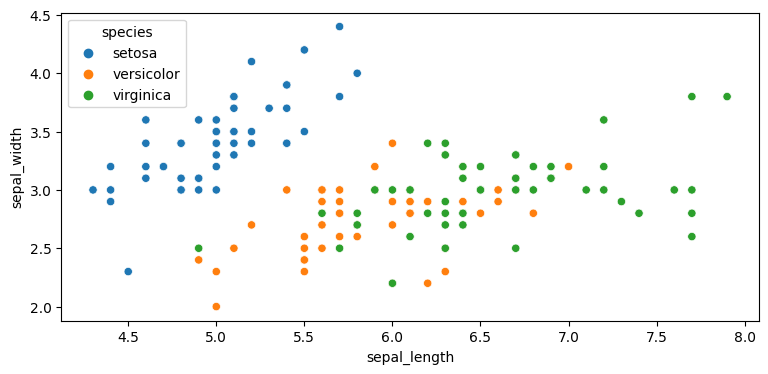

In [29]:
plt.figure(figsize=(9, 4))
sns.scatterplot(x="sepal_length", y="sepal_width", data=iris, hue="species")
plt.show()

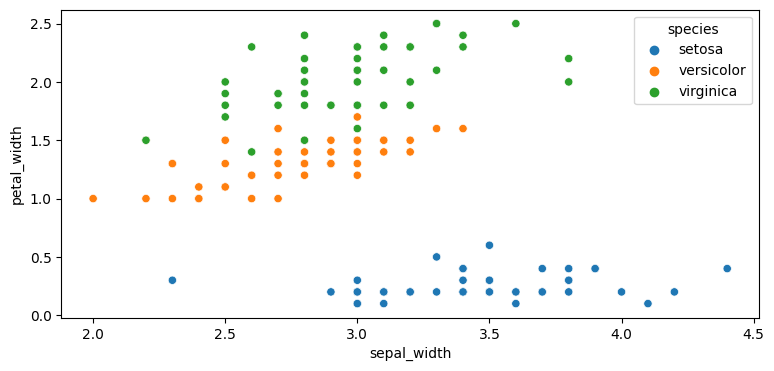

In [30]:
plt.figure(figsize=(9, 4))
sns.scatterplot(x="sepal_width", y="petal_width", data=iris, hue="species")
plt.show()

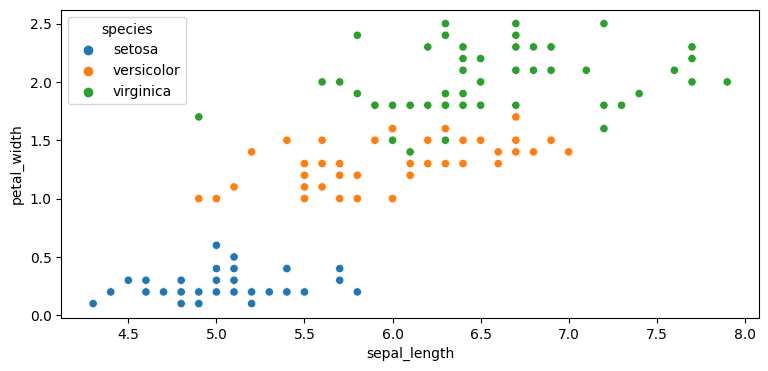

In [31]:
plt.figure(figsize=(9, 4))
sns.scatterplot(x="sepal_length", y="petal_width", data=iris, hue="species")
plt.show()

<Axes: xlabel='sepal_length'>

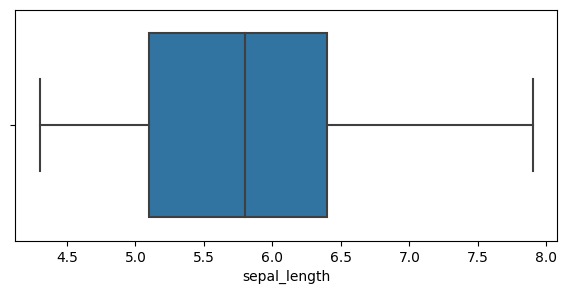

In [32]:
# checking of the outliers
plt.figure(figsize=(7, 3))
sns.boxplot(x='sepal_length', data=iris,)

<Axes: xlabel='sepal_width'>

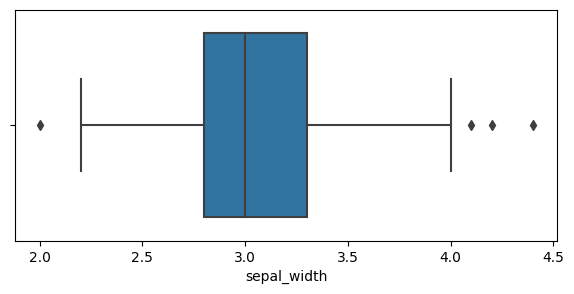

In [33]:
# checking of the outliers
plt.figure(figsize=(7, 3))
sns.boxplot(x='sepal_width', data=iris)

<Axes: xlabel='petal_width'>

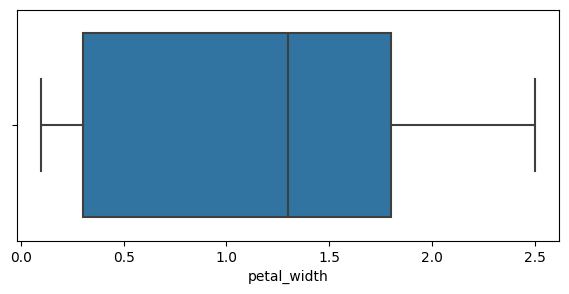

In [34]:
# checking of the outliers
plt.figure(figsize=(7, 3))
sns.boxplot(x='petal_width', data=iris)

### _Splitting of Dataset into training & testing dataset using Scikit Module_

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# feature matrix
X = iris.drop(['species', 'species_encoded'], axis=1)
X.head()

,sepal_length,sepal_width,petal_width
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2


In [37]:
# target matrix
y = iris.species_encoded
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species_encoded, dtype: int32

In [38]:
# 80% datasets for training the model & remaining 20% for the testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [39]:
len(X_train), len(X_test)

(119, 30)

## _Logistic Regression Model_

In [40]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [41]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [42]:
# prediction of test dataset
y_predict = lr_model.predict(X_test)

In [43]:
# training score
lr_model.score(X_train, y_train)

0.9495798319327731

In [44]:
# test score (model score)
lr_model.score(X_test, y_test)

1.0

In [45]:
# model accuracy score (model score)
metrics.accuracy_score(y_test, y_predict)

1.0

In [46]:
# target class-wise precision score
metrics.precision_score(y_test, y_predict, average=None)

array([1., 1., 1.])

In [47]:
# target class-wise recall score
metrics.recall_score(y_test, y_predict, average=None)

array([1., 1., 1.])

In [48]:
# target class-wise f1-score
metrics.f1_score(y_test, y_predict, average=None)

array([1., 1., 1.])

In [49]:
# classification report
target_names = ['class 0 (Setosa)', 'class 1 (Versicolor)', 'class 2 (Virginica)']

dict = classification_report(y_test, y_predict, target_names=target_names, output_dict=True)

In [50]:
lr_model_score = pd.DataFrame(dict)
lr_model_score

,class 0 (Setosa),class 1 (Versicolor),class 2 (Virginica),accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0
support,8.0,12.0,10.0,1.0,30.0,30.0


In [51]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_predict)
cm

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]], dtype=int64)

Text(45.72222222222221, 0.5, 'True Value')

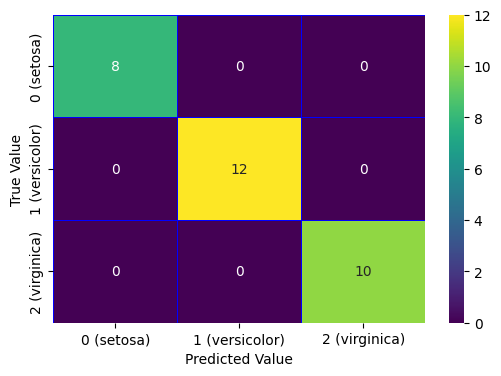

In [52]:
plt.rcParams['figure.figsize'] = (6,4)

sns.heatmap(cm, annot=True, cmap='viridis', linecolor='Blue', linewidths=0.5,
           xticklabels=['0 (setosa)', '1 (versicolor)', '2 (virginica)'],
           yticklabels=['0 (setosa)', '1 (versicolor)', '2 (virginica)'])

plt.xlabel('Predicted Value')
plt.ylabel('True Value')

## _SVM Model_

In [53]:
from sklearn.svm import SVC

In [54]:
svm_model = SVC()

In [55]:
svm_model.fit(X_train, y_train)

SVC()

In [56]:
# prediction of test dataset
y_predict = svm_model.predict(X_test)

In [57]:
# training score
svm_model.score(X_train, y_train)

0.9495798319327731

In [58]:
# test score (model score)
svm_model.score(X_test, y_test)

1.0

In [59]:
# model accuracy score (model score)
metrics.accuracy_score(y_test, y_predict)

1.0

In [60]:
# classification report
target_names = ['class 0 (Setosa)', 'class 1 (Versicolor)', 'class 2 (Virginica)']

dict = classification_report(y_test, y_predict, target_names=target_names, output_dict=True)

In [61]:
svm_model_score = pd.DataFrame(dict)
svm_model_score

,class 0 (Setosa),class 1 (Versicolor),class 2 (Virginica),accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0
support,8.0,12.0,10.0,1.0,30.0,30.0


In [62]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_predict)
cm

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]], dtype=int64)

Text(45.72222222222221, 0.5, 'True Value')

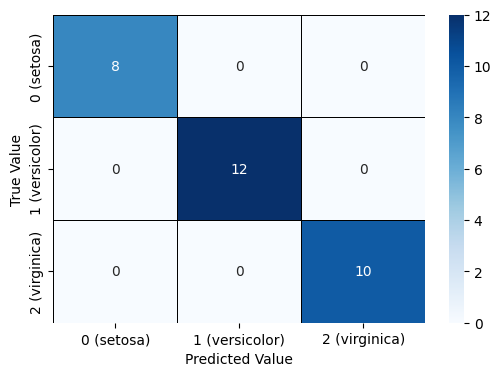

In [63]:
sns.heatmap(cm, annot=True, cmap='Blues', lw=0.5, linecolor='black',
            xticklabels=['0 (setosa)', '1 (versicolor)', '2 (virginica)'],
           yticklabels=['0 (setosa)', '1 (versicolor)', '2 (virginica)'])

plt.xlabel('Predicted Value')
plt.ylabel('True Value')

## _Random Forest Classification Model_

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rfc_model = RandomForestClassifier(n_estimators=100)

In [66]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
# prediction of test dataset
y_predict = rfc_model.predict(X_test)

In [68]:
# training score
rfc_model.score(X_train, y_train)

1.0

In [69]:
# test score
rfc_model.score(X_test, y_test)

0.9666666666666667

In [70]:
# model accuracy score
metrics.accuracy_score(y_test, y_predict)

0.9666666666666667

In [71]:
# classification report
target_names = ['class 0 (Setosa)', 'class 1 (Versicolor)', 'class 2 (Virginica)']

dict = classification_report(y_test, y_predict, target_names=target_names, output_dict=True)

In [72]:
rfc_model_score = pd.DataFrame(dict)
rfc_model_score

,class 0 (Setosa),class 1 (Versicolor),class 2 (Virginica),accuracy,macro avg,weighted avg
precision,1.0,1.000000,0.909091,0.966667,0.969697,0.969697
recall,1.0,0.916667,1.000000,0.966667,0.972222,0.966667
f1-score,1.0,0.956522,0.952381,0.966667,0.969634,0.966736
support,8.0,12.000000,10.000000,0.966667,30.000000,30.000000


In [73]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_predict)
cm

array([[ 8,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 10]], dtype=int64)

Text(45.72222222222221, 0.5, 'True Value')

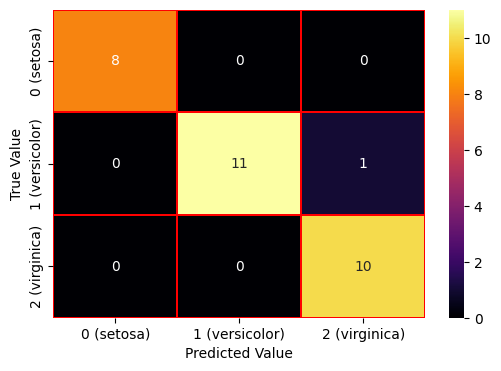

In [74]:
sns.heatmap(cm, annot=True, cmap='inferno', lw=0.2, linecolor='red',
            xticklabels=['0 (setosa)', '1 (versicolor)', '2 (virginica)'],
           yticklabels=['0 (setosa)', '1 (versicolor)', '2 (virginica)'])

plt.xlabel('Predicted Value')
plt.ylabel('True Value')

## _Decision Tree Classification Model_

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt_model = DecisionTreeClassifier()

In [77]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
# prediction of test dataset
y_predict = dt_model.predict(X_test)

In [79]:
# training score
dt_model.score(X_train, y_train)

1.0

In [80]:
# test score
dt_model.score(X_test, y_test)

0.9333333333333333

In [81]:
# model accuracy score
metrics.accuracy_score(y_test, y_predict)

0.9333333333333333

In [82]:
# classification report
target_names = ['class 0 (Setosa)', 'class 1 (Versicolor)', 'class 2 (Virginica)']

dict = classification_report(y_test, y_predict, target_names=target_names, output_dict=True)

In [83]:
dt_model_score = pd.DataFrame(dict)
dt_model_score

,class 0 (Setosa),class 1 (Versicolor),class 2 (Virginica),accuracy,macro avg,weighted avg
precision,1.0,1.000000,0.833333,0.933333,0.944444,0.944444
recall,1.0,0.833333,1.000000,0.933333,0.944444,0.933333
f1-score,1.0,0.909091,0.909091,0.933333,0.939394,0.933333
support,8.0,12.000000,10.000000,0.933333,30.000000,30.000000


In [84]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_predict)
cm

array([[ 8,  0,  0],
       [ 0, 10,  2],
       [ 0,  0, 10]], dtype=int64)

Text(45.72222222222221, 0.5, 'True Value')

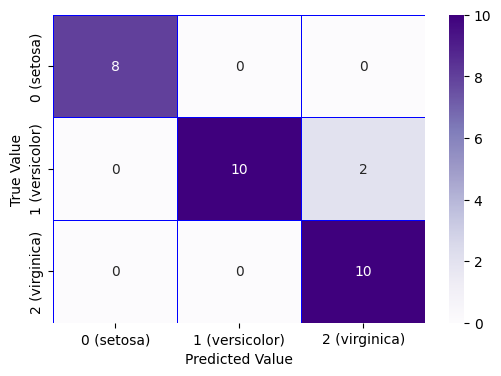

In [85]:
sns.heatmap(cm, annot=True, cbar=True, cmap='Purples', linewidths=0.5, linecolor='blue', 
            xticklabels=['0 (setosa)', '1 (versicolor)', '2 (virginica)'],
           yticklabels=['0 (setosa)', '1 (versicolor)', '2 (virginica)'])

plt.xlabel('Predicted Value')
plt.ylabel('True Value')

## _Comparision of the above Models using metrics score_

In [86]:
final_score_report = pd.DataFrame()

In [87]:
final_score_report = pd.concat([lr_model_score, svm_model_score, rfc_model_score, dt_model_score],
                               keys=['Logistic Regression Model', 'Support Vector Machine Model',
                                     'Random Forest Classification Model', 'Decision Tree Classification Model'],
                               axis=0)

final_score_report

class 0 (Setosa)  \
Logistic Regression Model          precision               1.0   
                                   recall                  1.0   
                                   f1-score                1.0   
                                   support                 8.0   
Support Vector Machine Model       precision               1.0   
                                   recall                  1.0   
                                   f1-score                1.0   
                                   support                 8.0   
Random Forest Classification Model precision               1.0   
                                   recall                  1.0   
                                   f1-score                1.0   
                                   support                 8.0   
Decision Tree Classification Model precision               1.0   
                                   recall                  1.0   
                                   f1-score                1.0   
                                   support                 8.0   

                                              class 1 (Versicolor)  \
Logistic Regression Model          precision              1.000000   
                                   recall                 1.000000   
                                   f1-score               1.000000   
                                   support               12.000000   
Support Vector Machine Model       precision              1.000000   
                                   recall                 1.000000   
                                   f1-score               1.000000   
                                   support               12.000000   
Random Forest Classification Model precision              1.000000   
                                   recall                 0.916667   
                                   f1-score               0.956522   
                                   support               12.000000   
Decision Tree Classification Model precision              1.000000   
                                   recall                 0.833333   
                                   f1-score               0.909091   
                                   support               12.000000   

                                              class 2 (Virginica)  accuracy  \
Logistic Regression Model          precision             1.000000  1.000000   
                                   recall                1.000000  1.000000   
                                   f1-score              1.000000  1.000000   
                                   support              10.000000  1.000000   
Support Vector Machine Model       precision             1.000000  1.000000   
                                   recall                1.000000  1.000000   
                                   f1-score              1.000000  1.000000   
                                   support              10.000000  1.000000   
Random Forest Classification Model precision             0.909091  0.966667   
                                   recall                1.000000  0.966667   
                                   f1-score              0.952381  0.966667   
                                   support              10.000000  0.966667   
Decision Tree Classification Model precision             0.833333  0.933333   
                                   recall                1.000000  0.933333   
                                   f1-score              0.909091  0.933333   
                                   support              10.000000  0.933333   

                                              macro avg  weighted avg  
Logistic Regression Model          precision   1.000000      1.000000  
                                   recall      1.000000      1.000000  
                                   f1-score    1.000000      1.000000  
                                   support    30.000000     30.000000  
Support Vector Machine Model

## _Comparision of model using Stratified k-fold_

In [88]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10)
kfold

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [89]:
# feature matrix
x_fold = iris.drop(['species', 'species_encoded'], axis=1)
x_fold.head()

,sepal_length,sepal_width,petal_width
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2


In [90]:
# target/label matrix
y_fold = iris.species_encoded
y_fold.head()

0    0
1    0
2    0
3    0
4    0
Name: species_encoded, dtype: int32

In [91]:
# empty list to store the score for each fold
lr_score = []
svm_score = []
rfc_score = []
dt_score = []

In [92]:
# function for the calculation of model-score
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [93]:
# append score for each fold using loop
for train_index, test_index in kfold.split(x_fold, y_fold):
    X_train = x_fold.iloc[train_index]
    X_test = x_fold.iloc[test_index]
    y_train = y_fold.iloc[train_index]
    y_test = y_fold.iloc[test_index]
    
    lr_score.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    svm_score.append(get_score(SVC(), X_train, X_test, y_train, y_test))    
    rfc_score.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))
    dt_score.append(get_score(DecisionTreeClassifier(), X_train, X_test, y_train, y_test))
    
len(lr_score), len(svm_score), len(rfc_score), len(dt_score)

(10, 10, 10, 10)

In [94]:
# function for the calculation of mean-score
def mean_score(score):
    sum = 0
    for i in range(len(score)):
        sum += score[i]
    return round((sum/len(score)), 4)

In [95]:
print('Logistic Regression Mean Score:\t\t', mean_score(lr_score))
print('Support Vector Machine Mean Score:\t', mean_score(svm_score))
print('Random Forest Mean Score:\t\t', mean_score(rfc_score))
print('Decision Tree Mean Score:\t\t', mean_score(dt_score))

Logistic Regression Mean Score:		 0.9533
Support Vector Machine Mean Score:	 0.9529
Random Forest Mean Score:		 0.9333
Decision Tree Mean Score:		 0.9395
